# Ford GoBike Data Exploration

## Preliminary Wrangling

This document explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds.

In [443]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [444]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [445]:
# high-level overview of data shape and composition
print(df.shape)
print('-'*100)
print(df.dtypes)
print('-'*100)
print(df.head(10))

(183412, 16)
----------------------------------------------------------------------------------------------------
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
----------------------------------------------------------------------------------------------------
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560  

In [446]:
#Convert missassigned data types

# id columns into objects
df = df.apply(lambda col: col.astype('object') if 'id' in col.name else col)

# date columns into datetime
df = df.apply(lambda col: pd.to_datetime(col) if 'time' in col.name else col)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [447]:
# descriptive statistics for numeric variables
print(df.describe())

        duration_sec  start_station_latitude  start_station_longitude  \
count  183412.000000           183412.000000            183412.000000   
mean      726.078435               37.771223              -122.352664   
std      1794.389780                0.099581                 0.117097   
min        61.000000               37.317298              -122.453704   
25%       325.000000               37.770083              -122.412408   
50%       514.000000               37.780760              -122.398285   
75%       796.000000               37.797280              -122.286533   
max     85444.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude  member_birth_year  
count         183412.000000          183412.000000      175147.000000  
mean              37.771427            -122.352250        1984.806437  
std                0.099490               0.116673          10.116689  
min               37.317298            -122.453704    

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64
----------------------------------------------------------------------------------------------------


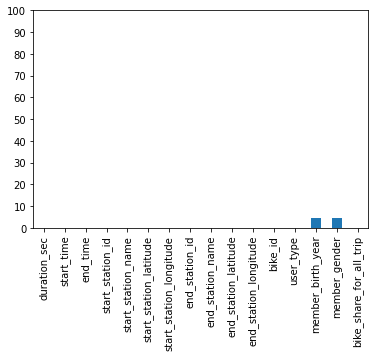

In [448]:
#check nan values

nanPerc = df.isna().sum()/len(df) * 100

#Create a Bar PLot to Investigate 
nanPerc.plot.bar()
plt.yticks(range(0,110,10))

print(nanPerc)
print('-'*100)
plt.show()

In [449]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

There are 183412 bike rides in ford GoBike sharing system with 16 entries each that describes the Ride details, The biker characteristics

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the most suitable way to make people use the Software more and the rides patterns

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Based on visual analysis I expect biker based details,location,Dates to help us alot as they describe the pattern of rides more than other features

## Univariate Exploration

I'll Start by visualizing Time patterns of rides 

In [450]:
#adding more time specific features


df['hour'] = df['start_time'].dt.hour
df['weekday'] = df['start_time'].dt.day_name()
df.iloc[:5,-2:]

,hour,weekday
0,17,Thursday
1,18,Thursday
2,12,Thursday
3,17,Thursday
4,23,Thursday


0       925
1       548
2       381
3       174
4       235
5       896
6      3485
7     10614
8     21056
9     15903
10     8364
11     7884
12     8724
13     8551
14     8152
15     9174
16    14169
17    21864
18    16827
19     9881
20     6482
21     4561
22     2916
23     1646
Name: hour, dtype: int64
----------------------------------------------------------------------------------------------------


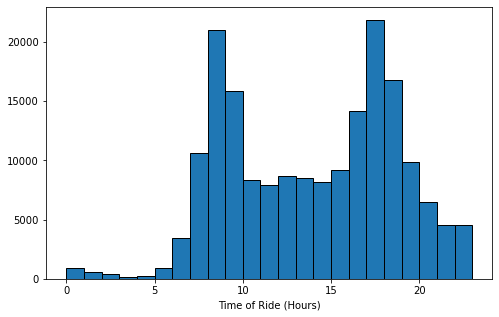

In [451]:
# start with a Histogram to find the distibution of the hours
binsize = 1  
bins = np.arange(0, df['hour'].max() + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'hour', bins=bins, edgecolor = "black")
plt.xlabel('Time of Ride (Hours)')

print(df['hour'].value_counts().sort_index())
print('-'*100)

plt.show()

We Can see that most rides are between 7-9 in the morning and 4-6 in the evening which means that the time of the ride is mostly adjusted to the work hours 


<b>Secondly, we'll Visualize the distribution of rides by weekday : day.</b>

Friday       28981
Monday       26852
Saturday     15405
Sunday       15523
Thursday     35197
Tuesday      31813
Wednesday    29641
Name: weekday, dtype: int64
----------------------------------------------------------------------------------------------------


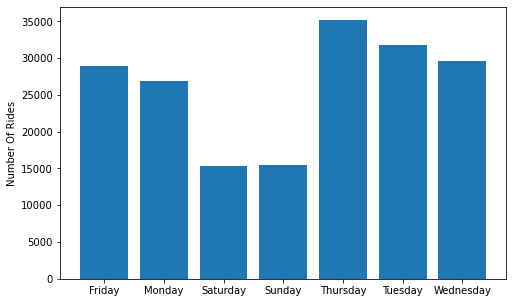

In [452]:
# plotting each Weekday
weekday_count = df['weekday'].value_counts().sort_index()

plt.figure(figsize=[8, 5])
plt.bar(data = weekday_count, x = weekday_count.index,height=weekday_count.values)
plt.ylabel('Number Of Rides')
print(weekday_count)
print('-'*100)
plt.show()

As expected the number of rides dropped at the weekend 

By investigating on the times of Rides based on hourse and days we can conclude that the rides are adjusted on the workday and we can safely put the assumption that most users are workers and we will investigate more on that by checking Age distribution


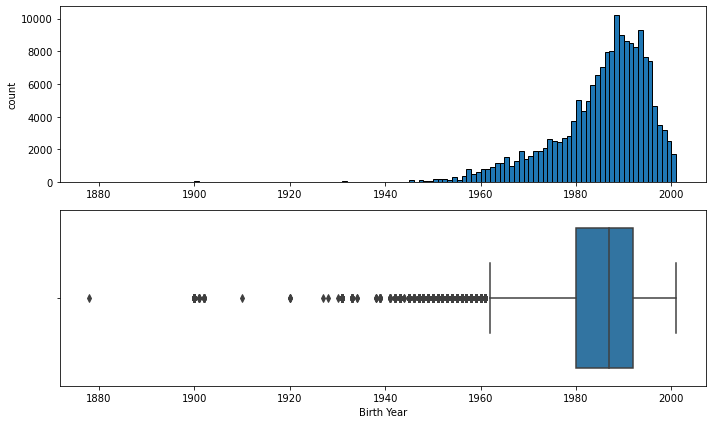

In [453]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_year=df['member_birth_year'].min()
max_year=df['member_birth_year'].max()

binsize = 1
bins = np.arange(min_year,max_year + binsize, binsize)
axes[0].hist(data=df, x='member_birth_year', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='member_birth_year', ax=axes[1])

plt.xlabel('Birth Year')
plt.tight_layout()
plt.show()

we can see there's some outliers in the years which are unrealistic and needs to be filtered whoever we won't remove the row we can set the value as a nan so it won't cause disortion in the data

In [454]:
#set year less than 1950 as nan
df[df['member_birth_year'] < 1940] = np.nan

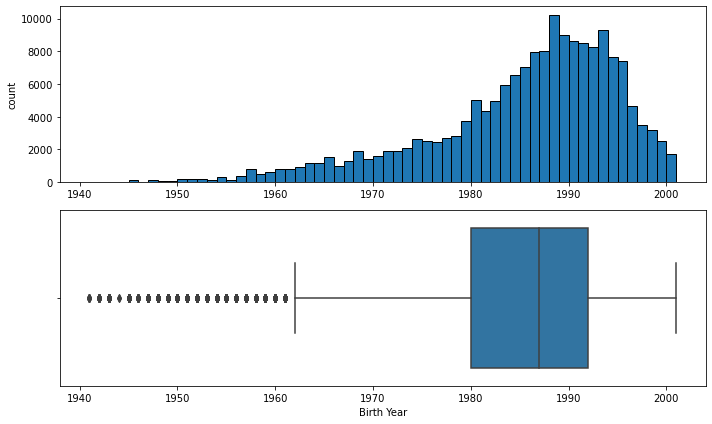

In [455]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_year=df['member_birth_year'].min()
max_year=df['member_birth_year'].max()

binsize = 1
bins = np.arange(min_year,max_year + binsize, binsize)
axes[0].hist(data=df, x='member_birth_year', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='member_birth_year', ax=axes[1])

plt.xlabel('Birth Year')
plt.tight_layout()
plt.show()

as expected the age is mostly between 1980-late 90s which is in the range of san francisco workforce age 25-55 (https://www.ppic.org/publication/who-are-californias-workers/) 

In [456]:
#assigning users into age groups

current_year = 2017  
df['age'] = current_year - df['member_birth_year']
ageborder = [20, 30, 40, 50, 55, 70, 80] 
labels = ['20-29', '30-39', '40-49', '50-55', '55-69', '70-']
df['age_group'] = pd.cut(df['age'], bins=ageborder, labels=labels)  

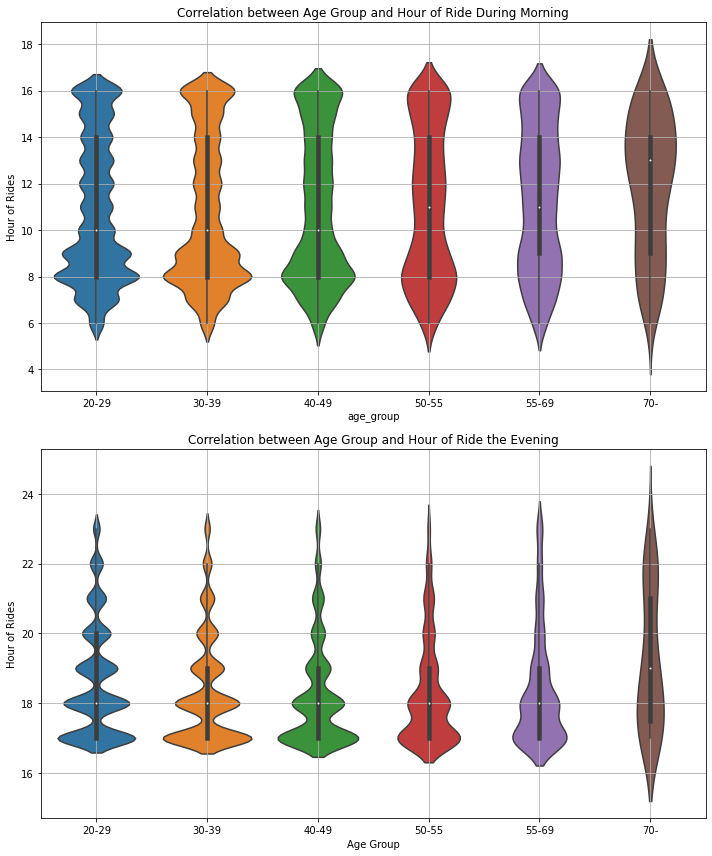

In [457]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Correlation in the morning
df_morning = df[(df['hour'] >= 6) & (df['hour'] <= 16)]
sns.violinplot(data=df_morning, x='age_group', y='hour', ax=axes[0])
axes[0].set_title('Correlation between Age Group and Hour of Ride During Morning')
axes[0].set_ylabel('Hour of Rides')
axes[0].grid(True)

# Correlation in the evening
df_evening = df[ (df['hour'] > 16)]
sns.violinplot(data=df_evening, x='age_group', y='hour', ax=axes[1])
axes[1].set_title('Correlation between Age Group and Hour of Ride the Evening')
axes[1].set_ylabel('Hour of Rides')
axes[1].set_xlabel('Age Group')
axes[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

using violin plot to visualize the relation between the age group and the hour of the ride during the evening and the morning and we can see that in age groups between 20-50 the correlation is higher while in the rest it's more distiributed

<b>now we'll Move to Ride Duration and analyze it</b>

In [458]:
#first lets check if it matches with the start and end time
TimeDF_copy = df.copy()
TimeDF_copy['trip_duration_seconds'] = (TimeDF_copy['end_time'] - TimeDF_copy['start_time']).dt.total_seconds()
TimeDF_copy[np.floor(TimeDF_copy['trip_duration_seconds']) != TimeDF_copy['duration_sec']]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,hour,weekday,age,age_group,trip_duration_seconds
1285,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5266,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5447,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10827,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177885,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177955,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179280,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182830,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can see the numbers match except for some nan values so they will be removed

In [459]:
#drop rows with more than 50% nan data

print(f'shape before : {df.shape}')
print('-'*100)
df = df.dropna(thresh=len(df.columns) * 0.5)
print(f'shape after : {df.shape}')
print('-'*100)


shape before : (183412, 20)
----------------------------------------------------------------------------------------------------
shape after : (183209, 20)
----------------------------------------------------------------------------------------------------


<b>after cleaning the nan values we'll start the analysis for duration</b>

In [460]:
#change it to minutes for easier observation and a better scale

df['ride_duration'] = df['duration_sec'] / 60
df.drop(columns=['duration_sec'], inplace=True)


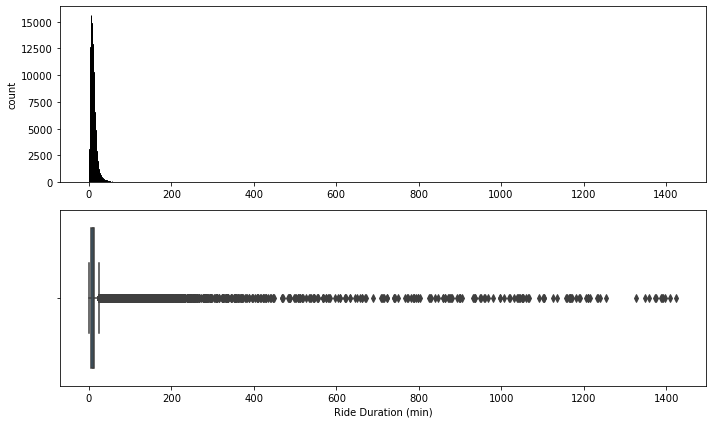

In [461]:
# distribution of ride duration
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_duration = df['ride_duration'].min() 
max_duration = df['ride_duration'].max()

binsize = 1
bins = np.arange(min_duration, max_duration + binsize, binsize)
axes[0].hist(data=df, x='ride_duration', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='ride_duration', ax=axes[1])

plt.xlabel('Ride Duration (min)')
plt.tight_layout()
plt.show()

the data looks extremely skewed so we'll try using the mean (12 minutes) as estimation to avoid the outliers without removing them as they may indicate other things like users not stopping the ride until even after they reach their destination

we'll set the range to 60 minutes as by looking at the mean and the 3rd quartile range (15 min) the data seems to be left skewed and most of the values would fall in that range

In [558]:


# Filter out outliers
outliers =df[~((df['ride_duration'] < 35))]
df = df[(df['ride_duration'] < 35)]


In [559]:
outliers.shape

(2035, 22)

there's 1710 outliers which are 5% of the data and they can represent the rides in which riders didn't end the ride until later on which we can investigate on

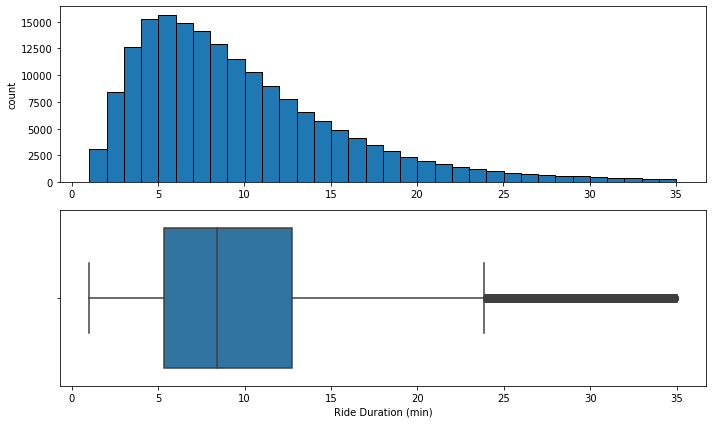

In [560]:
# distribution of ride duration after filtering
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

#histogram
min_duration = df['ride_duration'].min() 
max_duration = df['ride_duration'].max()

binsize = 1
bins = np.arange(min_duration, max_duration + binsize, binsize)
axes[0].hist(data=df, x='ride_duration', bins=bins, edgecolor="black")
axes[0].set_ylabel('count')

#boxplot
sns.boxplot(data=df, x='ride_duration', ax=axes[1])

plt.xlabel('Ride Duration (min)')
plt.tight_layout()
plt.show()

We can see that most rides are within 20 minutes which indicates that most riders use the bike for closer trips however some riders use it for 20+ minutes rides which can have a correlation with the walkability of the district 

<b>categorical variables</b>
<br>
We will start with the start Location where we want to see which areas are more active, we will use geopy API to get the neighbourhood for each street using the coordinates

we will start by shortening the street names to get better results in the scraping

In [561]:
#first lets extract street names and assign them to san franscisco for better accuracy of the api 
df['start_coordinate'] = list(zip(df['start_station_latitude'], df['start_station_longitude']))
df['end_coordinate'] = list(zip(df['end_station_latitude'], df['end_station_longitude']))

start_locationsDF = df.loc[:,['start_coordinate']]
start_locationsDF.drop_duplicates(inplace=True)

end_locationsDF = df.loc[:,['end_coordinate']]
end_locationsDF.drop_duplicates(inplace=True)


start_locationsDF.head()

,start_coordinate
4,"(37.8045623549303, -122.27173805236816)"
5,"(37.7704074, -122.3911984)"
6,"(37.3172979, -121.884995)"
7,"(37.79539293725452, -122.4047702550888)"
9,"(37.788975, -122.403452)"


the reason that we created a separate dataframe for each start and end locations is bcz the distinct locations if we dropped the duplicates in the same df would be significantly higher so to reduce the api time by a huge margin we created to seperate dataframes

Now We will use the api to get every Location Greater Area

In [478]:
# save a copy so that it's not lost after Run
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm

# Initialize the geolocator
geolocator = Nominatim(user_agent='FordGoBike')

# Initialize the RateLimiter with a rate limit of 1 request per second
geocode = RateLimiter(geolocator.reverse, min_delay_seconds=0.7)

# Apply the geocoding function to each start coordinate
#we're using tqdm module to check the progress of the api responses
pbar = tqdm(total=len(end_locationsDF)+len(start_locationsDF))
def apply_geocode(coordinate):
    pbar.update(1)
    return geocode(coordinate)

start_locationsDF['address'] = start_locationsDF['start_coordinate'].apply(apply_geocode)
end_locationsDF['address'] = end_locationsDF['end_coordinate'].apply(apply_geocode)

# Close the progress bar
pbar.close()
# Extract the 'neighbourhood' from the address information
start_locationsDF['start_area'] = start_locationsDF['address'].apply(lambda x: (x.raw['address']['neighbourhood'] if 'neighbourhood' in x.raw['address'].keys() else x.raw['address']['road'] if 'road' in x.raw['address'].keys() else None))
end_locationsDF['end_area'] = end_locationsDF['address'].apply(lambda x: (x.raw['address']['neighbourhood'] if 'neighbourhood' in x.raw['address'].keys() else x.raw['address']['road'] if 'road' in x.raw['address'].keys() else None))

 79%|███████████████████████████████████████████████████████████████▏                | 544/689 [06:24<01:42,  1.42it/s]RateLimiter caught an error, retrying (0/2 tries). Called with (*((37.8225475, -122.2663179),), **{}).
Traceback (most recent call last):
  File "C:\Users\I7\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\I7\anaconda3\lib\site-packages\urllib3\util\connection.py", line 72, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\Users\I7\anaconda3\lib\socket.py", line 954, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\I7\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = sel

By using geopy API we successfully got the neighbourhoods & streets using the coordinates to get a more detailed info abt the patterns of the rides

In [ ]:
# Merge the DataFrames
SF_df = df.merge(start_locationsDF[['start_coordinate', 'start_area']], on='start_coordinate')
SF_df = SF_df.merge(end_locationsDF[['end_coordinate', 'end_area']],on='end_coordinate')
SF_df.head()

In [563]:
# saving the new DF
#SF_df.to_csv('Ford_GoBike_Updated.csv',index=False)

In [567]:
SF_df = pd.read_csv('Ford_GoBike_Updated.csv')
SF_df = SF_df[(SF_df['ride_duration'] < 35)]

In [568]:
len(SF_df['start_area'].unique())

128

there's 128 unique area (neighbourhoods) in the data set while there was 315 different streets

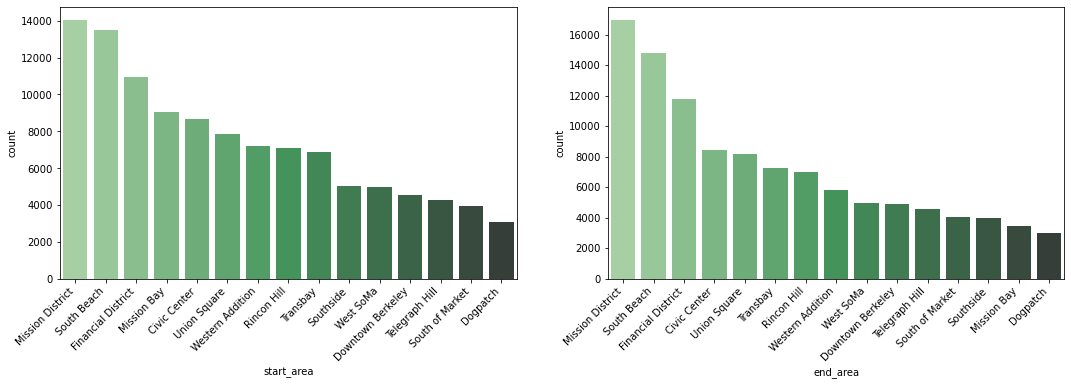

In [569]:


fig, ax = plt.subplots(ncols=2, figsize = [18,5])


default_color = sns.color_palette()[0]
sns.countplot(data=SF_df, x="start_area", palette="Greens_d",order=SF_df.start_area.value_counts().sort_values(ascending=False).iloc[:15].index, ax=ax[0])
ax[0].set_xticklabels(labels=SF_df.start_area.value_counts().sort_values(ascending=False).iloc[:15].index, rotation=45, ha='right')

sns.countplot(data=SF_df, x="end_area", palette="Greens_d",order=SF_df.end_area.value_counts().sort_values(ascending=False).iloc[:15].index, ax=ax[1])
ax[1].set_xticklabels(labels=SF_df.end_area.value_counts().sort_values(ascending=False).iloc[:15].index, rotation=45, ha='right')


  
plt.show()

The most common start and end Locations.
we can see that the neighbourhoods show similar results in start and end locations meaning the rides are normally in closer ranges 

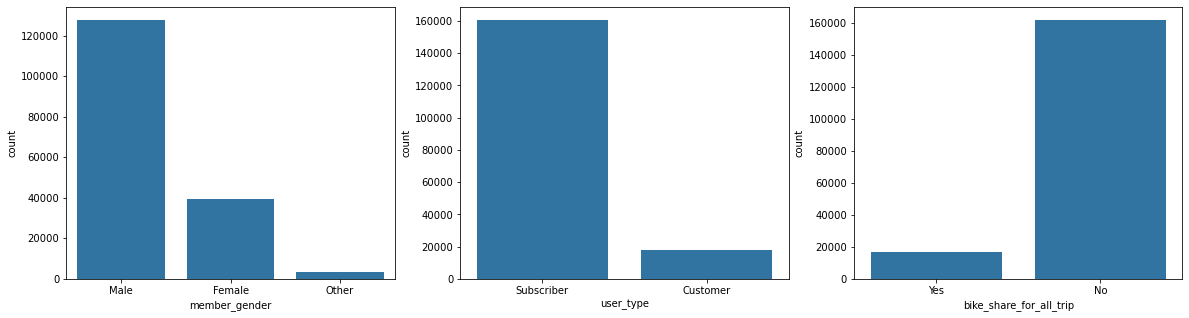

In [570]:

#counting user details variables
fig, ax = plt.subplots(ncols=3, figsize = [20,5])

default_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'member_gender', color = default_color, ax = ax[0])
sns.countplot(data = df, x = 'user_type', color = default_color, ax = ax[1])
sns.countplot(data = df, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])

  
plt.show()

The initial plot of the x, y, and z features show some immediate points of attention. On the y and z plots, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. The left limits of all three plots also suggest that there are some points that take unusually small values. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The start and end date needed to be changed and adjusted for better use and the age of user had some unusual values,trip Duration had extreme outliers too

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the trip Durationnvariable, a number of outlier points were identified. Overall, these points can be characterized as part of the trip pattern where some users (5% of the rides) tend to not end the trip until later
<br>
the user age had some outliers too but they were managed and removed as they were irrational

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [571]:
SF_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178421 entries, 0 to 181498
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_time               178421 non-null  object 
 1   end_time                 178421 non-null  object 
 2   start_station_id         178234 non-null  float64
 3   start_station_name       178234 non-null  object 
 4   start_station_latitude   178421 non-null  float64
 5   start_station_longitude  178421 non-null  float64
 6   end_station_id           178234 non-null  float64
 7   end_station_name         178234 non-null  object 
 8   end_station_latitude     178421 non-null  float64
 9   end_station_longitude    178421 non-null  float64
 10  bike_id                  178421 non-null  int64  
 11  user_type                178421 non-null  object 
 12  member_birth_year        170754 non-null  float64
 13  member_gender            170754 non-null  object 
 14  bike

In [572]:
numeric_vars = ['hour','ride_duration', 'age',]
categoric_vars = ['weekday','member_gender','user_type','age_group']

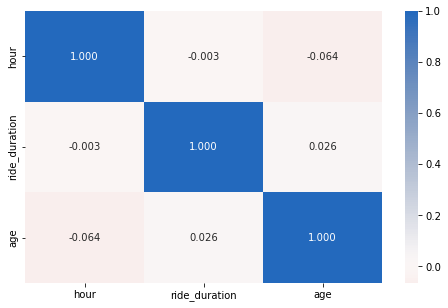

In [573]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(SF_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

as we can see there's no clear realtion between the numeric values in the df but we can notice the relation in categorical values based on the assumptions we made and the visuals

<Figure size 720x720 with 0 Axes>

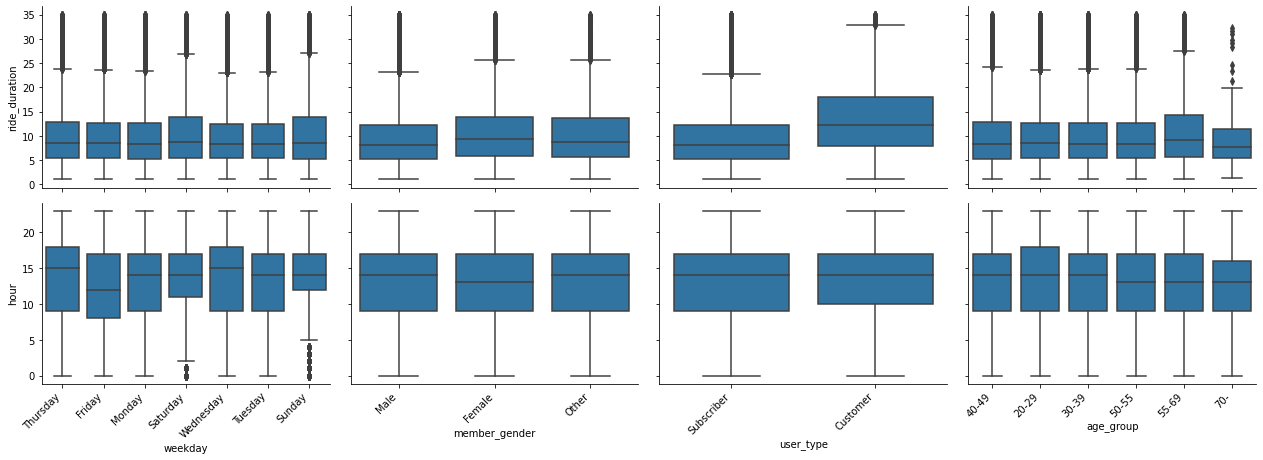

In [574]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

# Deprecated
# samples = np.random.choice(diamonds.shape[0], 2000, replace = False)
# diamonds_samp = diamonds.loc[samples,:]



def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)
    plt.xticks(rotation=45,ha='right')


plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = SF_df, y_vars = ['ride_duration', 'hour'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
plt.xticks(rotation=45,ha='right')
g.map(boxgrid)
plt.show();

There appears to be a relation between the hour and the numeric columns except in the weekday there's some different relation during saturday and sunday while the other categories indicate the same thing, the ride duration seems to be the same throughout different categories

Now lets look into the some categorical columns with the top areas

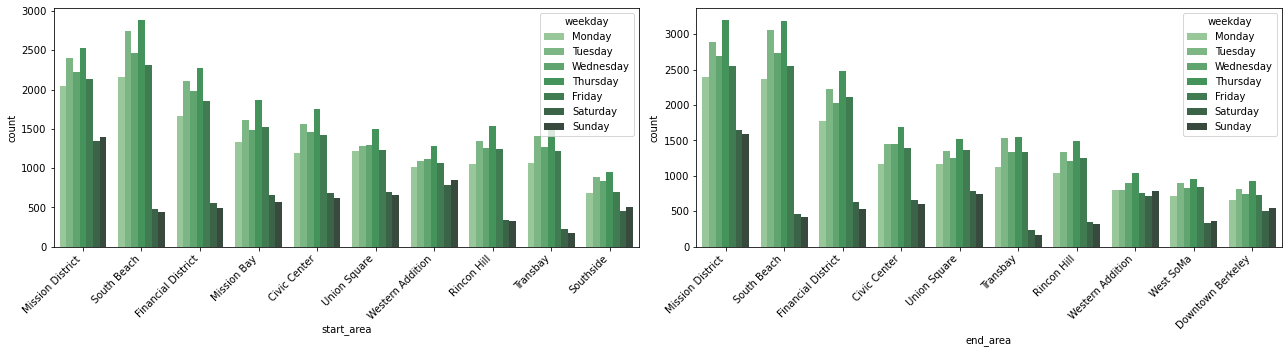

In [575]:

fig, ax = plt.subplots(ncols=2, figsize=[18, 5])
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

default_color = sns.color_palette()[0]

ax1 = plt.subplot(1, 2, 1)
top_start_areas = SF_df['start_area'].value_counts().sort_values(ascending=False).head(10).index
start_area_order = SF_df.loc[SF_df['start_area'].isin(top_start_areas), 'start_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=SF_df[SF_df['start_area'].isin(top_start_areas)], x="start_area", hue='weekday', palette="Greens_d", order=start_area_order,hue_order=weekday_order, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = plt.subplot(1, 2, 2)
top_end_areas = SF_df['end_area'].value_counts().sort_values(ascending=False).head(10).index
end_area_order = SF_df.loc[SF_df['end_area'].isin(top_end_areas), 'end_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=SF_df[SF_df['end_area'].isin(top_end_areas)], x="end_area", hue='weekday', palette="Greens_d", order=end_area_order,hue_order=weekday_order, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


We can see that count varies each day and significantly drops everywhere during the end of the week but we can notice a strange pattern here as the general count of rides decrease the amount of trips during the weekend doesn't significantly decrease we can investigate more on that by seeing the areas in the middle of the rankings

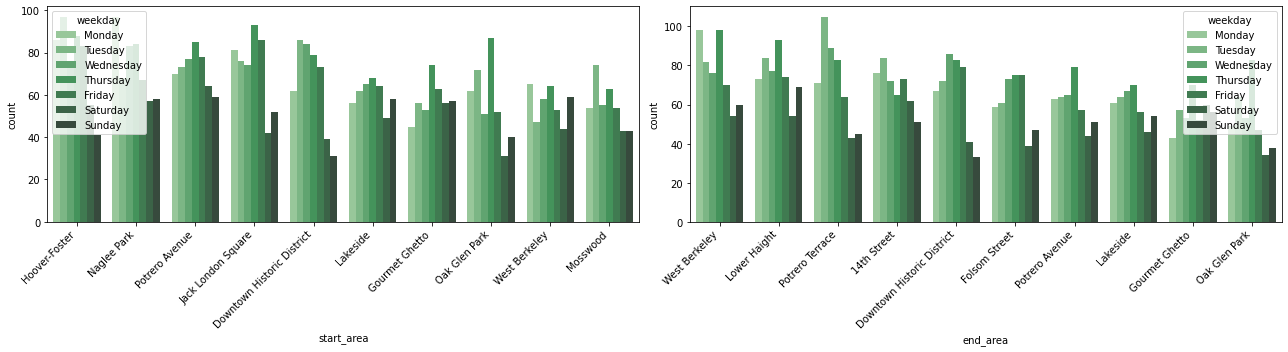

In [576]:
middle_start_areas = SF_df['start_area'].value_counts().iloc[int(len(SF_df['start_area'].unique())/2):int((len(SF_df['start_area'].unique())/2)+10)].index
middle_end_areas = SF_df['end_area'].value_counts().iloc[int(len(SF_df['end_area'].unique())/2):int((len(SF_df['end_area'].unique())/2)+10)].index

fig, ax = plt.subplots(ncols=2, figsize=[18, 5])
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

default_color = sns.color_palette()[0]

ax1 = plt.subplot(1, 2, 1)
start_area_order = SF_df.loc[SF_df['start_area'].isin(middle_start_areas), 'start_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=SF_df[SF_df['start_area'].isin(middle_start_areas)], x="start_area", hue='weekday', palette="Greens_d", order=start_area_order,hue_order=weekday_order, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


ax2 = plt.subplot(1, 2, 2)
end_area_order = SF_df.loc[SF_df['end_area'].isin(middle_end_areas), 'end_area'].value_counts().sort_values(ascending=False).index
sns.countplot(data=SF_df[SF_df['end_area'].isin(middle_end_areas)], x="end_area", hue='weekday', palette="Greens_d", order=end_area_order,hue_order=weekday_order, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

we can see that there's less correlation and the rides are sometimes high in the weekend which can be explained that the areas that are in the top are mostly worker dependant areas were most services are so the rides are more in the weekdays rather than weekends while normal areas have more distributed number of rides through the week as they're not dependant on workSF_df

<b>lets look at the correlation between the age of the rider and the time of the ride to see it from a different prespective



In [578]:
#assigning users into age groups

current_year = 2017  
df['age'] = current_year - df['member_birth_year']
ageborder = [20, 30, 40, 50, 55, 70, 80] 
labels = ['20-29', '30-39', '40-49', '50-55', '55-69', '70-']
df['age_group'] = pd.cut(df['age'], bins=ageborder, labels=labels)  

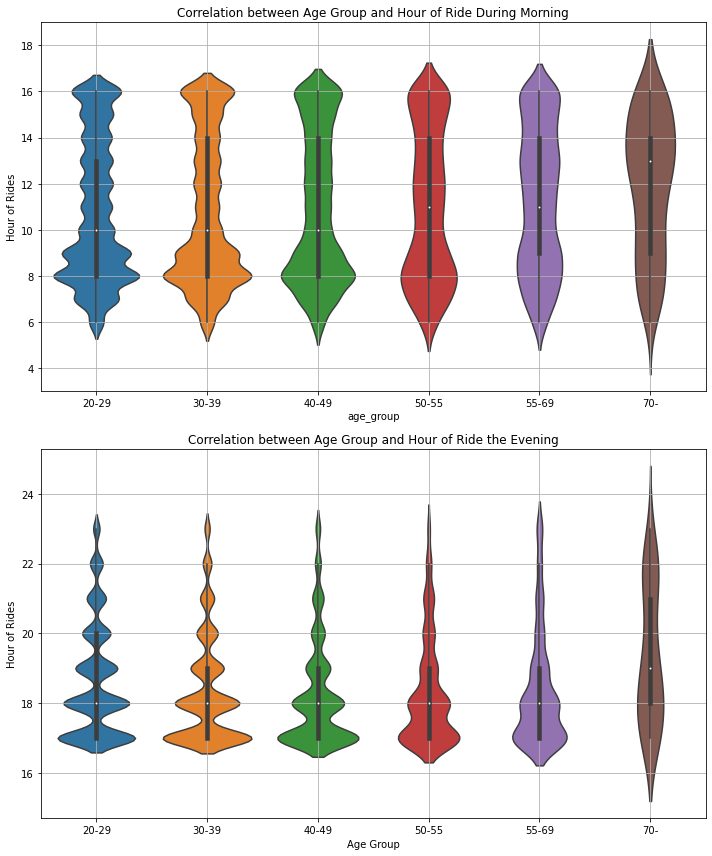

In [579]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Correlation in the morning
df_morning = df[(df['hour'] >= 6) & (df['hour'] <= 16)]
sns.violinplot(data=df_morning, x='age_group', y='hour', ax=axes[0])
axes[0].set_title('Correlation between Age Group and Hour of Ride During Morning')
axes[0].set_ylabel('Hour of Rides')
axes[0].grid(True)

# Correlation in the evening
df_evening = df[ (df['hour'] > 16)]
sns.violinplot(data=df_evening, x='age_group', y='hour', ax=axes[1])
axes[1].set_title('Correlation between Age Group and Hour of Ride the Evening')
axes[1].set_ylabel('Hour of Rides')
axes[1].set_xlabel('Age Group')
axes[1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

using violin plot to visualize the relation between the age group and the hour of the ride during the evening and the morning and we can see that in age groups between 20-50 the hours are more skewed into a is higher while in the rest it's more distiributed

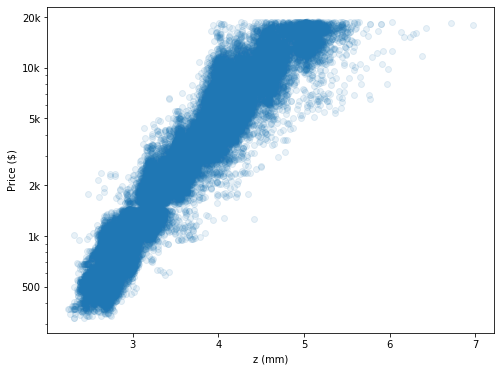

In [24]:
# since x, y, and z have a polynomial relationship with carat, let's see how
# one of them correlates with price.
plt.figure(figsize = [8, 6])
plt.scatter(data = diamonds, x = 'z', y = 'price', alpha = 1/10)
plt.xlabel('z (mm)')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')
plt.show()

Plotting one of the size dimensions against price generates a relationship that looks much more linear. I'll write a function to perform the cube root and its inverse (just cubing) so I can create this kind of plot on carat. Carat is preferable to 'x', 'y', or 'z' for its general audience interpretability.

In [25]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

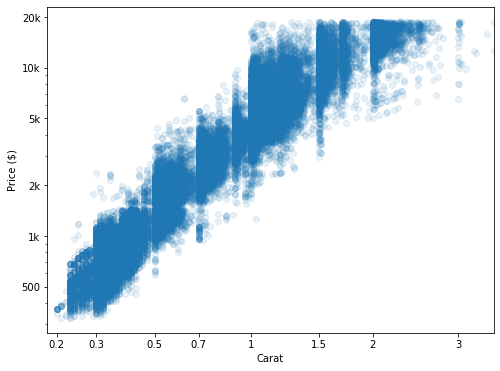

In [26]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])
plt.scatter(data = diamonds, x = 'cr_carat', y = 'price', alpha = 1/10)

carat_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]
plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
plt.xlim([cuberoot_trans(.18), cuberoot_trans(3.5)])
plt.xlabel('Carat')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')

plt.show()

Now, let's take a second look at the price and carat distributions on the three categorical variables: cut, color, and clarity.

In [27]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

diamonds['log_price'] = diamonds['price'].apply(log_trans)

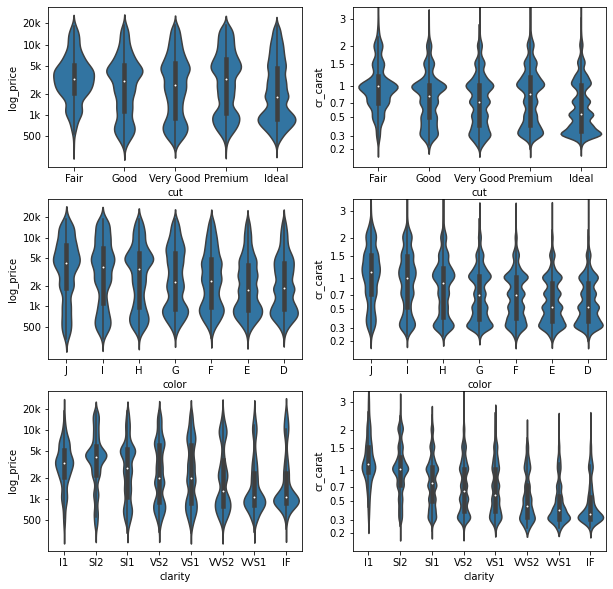

In [28]:
# plot the categorical variables against price and carat again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [10,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = diamonds, x = var, y = 'log_price', ax = ax[i,0],
               color = default_color)
    ax[i,0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[i,0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
    sb.violinplot(data = diamonds, x = var, y = 'cr_carat', ax = ax[i,1],
               color = default_color)
    ax[i,1].set_yticks(cuberoot_trans(np.array(carat_ticks)))
    ax[i,1].set_yticklabels(carat_ticks)
    ax[i,1].set_ylim(cuberoot_trans(np.array([0.1, 3.5])))

plt.show()

The plot of the full data using a violin plot and variable transformations reveals much more than the earlier box plots. It is highly suggested that the decrease in average price across increasing quality is due to the average diamond size decreasing with increasing quality. This is clearest in the plots across clarity, moderately visible with cut, and least evident with color. It will be interesting to see how the categories map in the multivariate analysis.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Price had a surprisingly high amount of correlation with the diamond size, even before transforming the features. An approximately linear relationship was observed when price was plotted on a log scale and carat was plotted with a cube-root transform. The scatterplot that came out of this also suggested that there was an upper bound on the diamond prices available in the dataset, since the range of prices for the largest diamonds was much narrower than would have been expected, based on the price ranges of smaller diamonds.

There was also an interesting relationship observed between price and the categorical features. For all of cut, color, and clarity, lower prices were associated with increasing quality. One of the potentially major interacting factors is the fact that improved quality levels were also associated with smaller diamonds. This will have to be explored further in the next section.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected relationships were found in the association between the 'x', 'y', and 'z' measurements of diamonds to the other linear dimensions as well as to the 'carat' variable. A small negative correlation was observed between table size and depth, but neither of these variables show a strong correlation with price, so they won't be explored further. There was also a small interaction in the categorical quality features. Diamonds of lower clarity appear to have slightly better cut and color grades.


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and carat.

In [29]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(3.5)+.05, .05)
    bins_y = np.arange(2.4, 4.3+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
    plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),
               [500, '1k', '2k', '5k', '10k', '20k'])

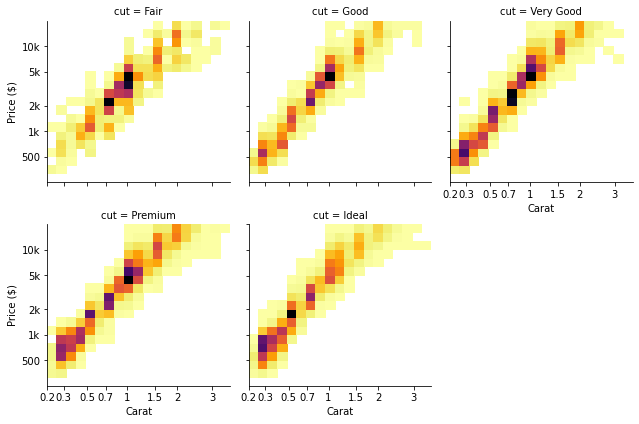

In [30]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = diamonds, col = 'cut', col_wrap = 3, height = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

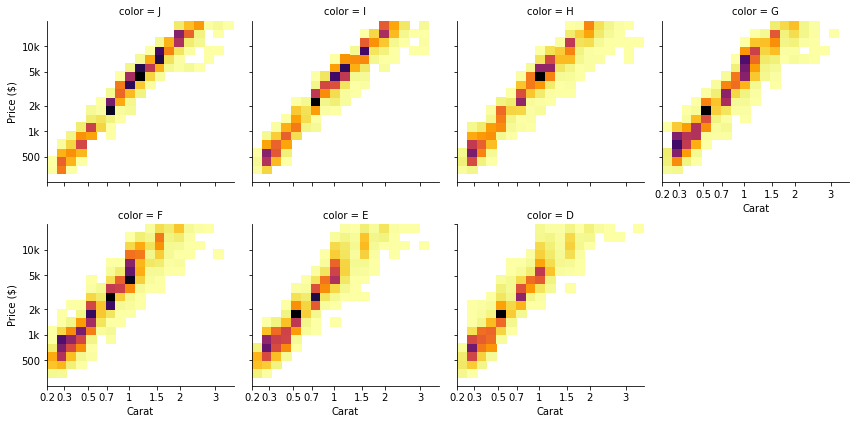

In [31]:
# create faceted heat maps on levels of the color variable
g = sb.FacetGrid(data = diamonds, col = 'color', col_wrap = 4, height = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

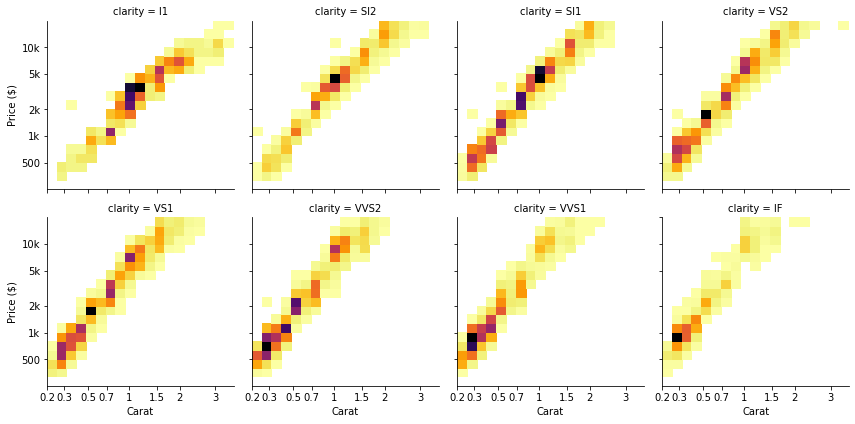

In [32]:
# create faceted heat maps on levels of the clarity variable
g = sb.FacetGrid(data = diamonds, col = 'clarity', col_wrap = 4, height = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

In each of the faceted heat maps, you can see the relationship of quality level against price and diamond size, to varying levels of effectiveness. As the quality level increases, the 'cloud' of points moves towards the upper left of the plot, thus showing increased prices but also smaller diamonds. This is clearest in the clarity plot.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


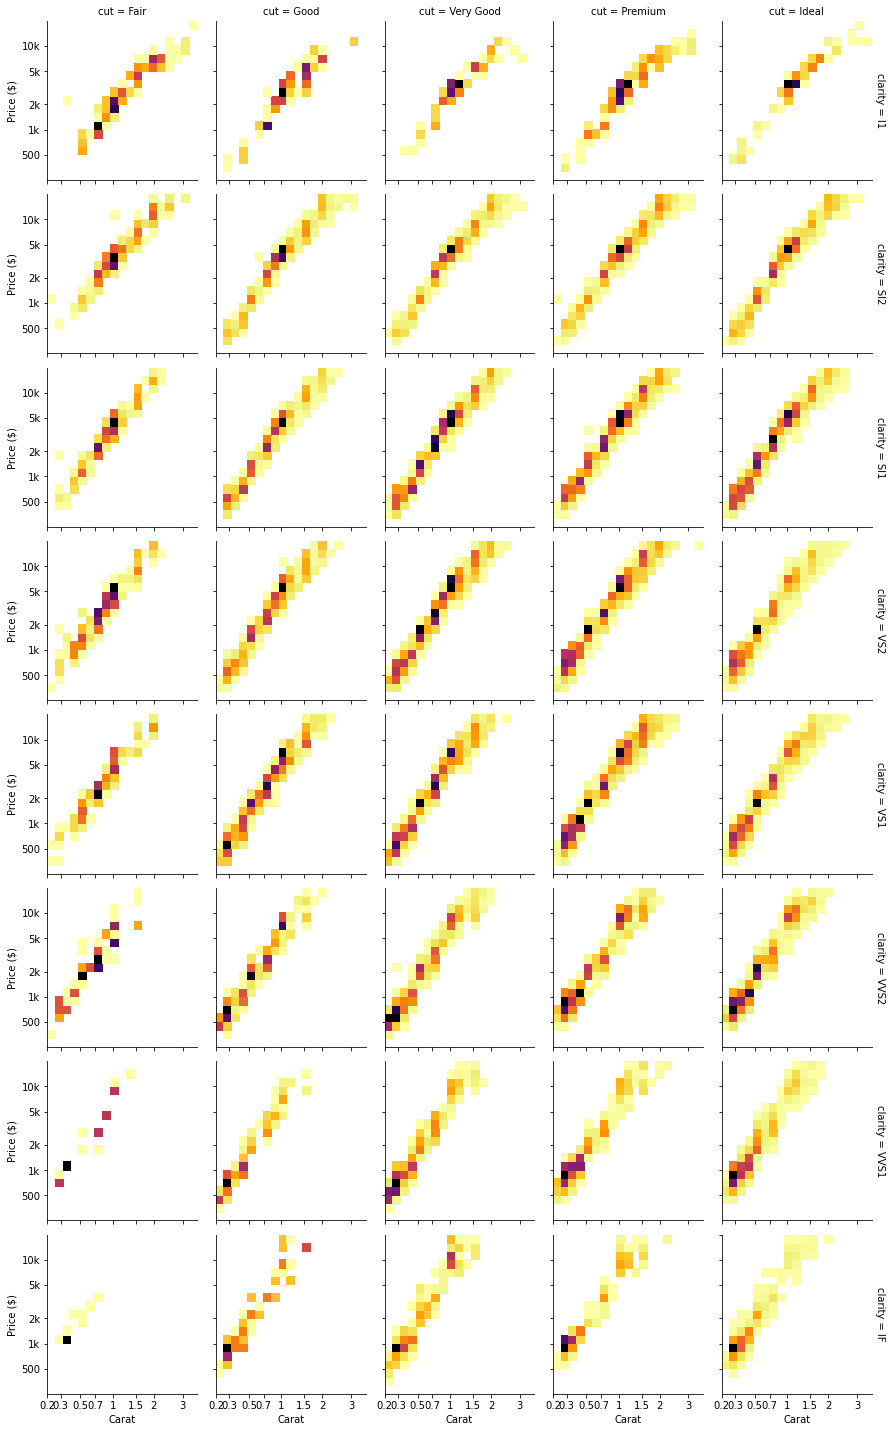

In [33]:
# create faceted heat maps on levels of cut and clarity
g = sb.FacetGrid(data = diamonds, col = 'cut', row = 'clarity', size = 2.5,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)], margin_titles = True)
g.map(hist2dgrid, 'cr_carat', 'log_price', color = 'inferno_r')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

plt.show()

I tried looking at a faceted heat map across two quality dimensions, but it seems like there's too many facets to look at. Perhaps a better summary can come from looking at only diamonds of a specific carat size.

In [34]:
# select diamonds of approximately 1 carat
diamond_flag = (diamonds['carat'] >= 0.99) & (diamonds['carat'] <= 1.03)
diamonds_1c = diamonds.loc[diamond_flag,:]

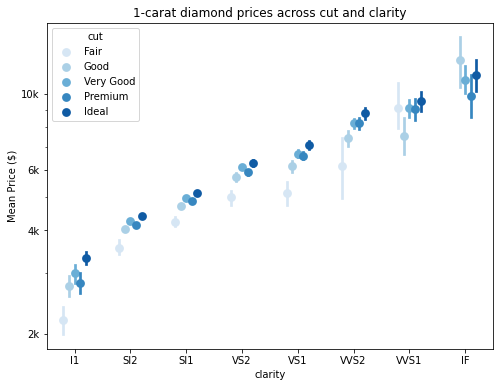

In [35]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = diamonds_1c, x = 'clarity', y = 'price', hue = 'cut',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('1-carat diamond prices across cut and clarity')
plt.ylabel('Mean Price ($)')
plt.yscale('log')
plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

A dodged point plot for diamonds of approximately 1 carat in size shows the clear influence of clarity and cut on diamond price. The larger error bars on the right side are due to there being fewer diamonds at higher clarity grades at this diamond size. There also appear to be fewer diamonds of grade 'Fair' on the higher clarity grades, with none on the highest 'IF' rating.

In [36]:
# select diamonds of approximately 0.3 carat
diamond_flag = (diamonds['carat'] >= 0.29) & (diamonds['carat'] <= 0.33)
diamonds_sml = diamonds.loc[diamond_flag,:]

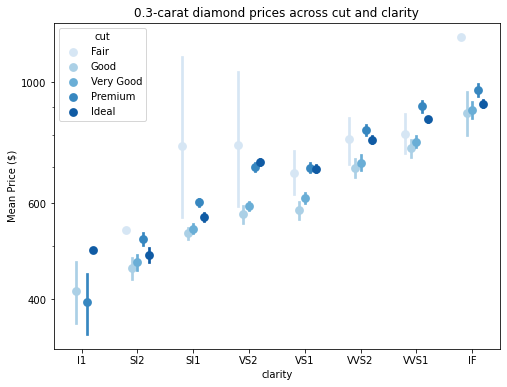

In [37]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = diamonds_sml, x = 'clarity', y = 'price', hue = 'cut',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('0.3-carat diamond prices across cut and clarity')
plt.ylabel('Mean Price ($)')
plt.yscale('log')
plt.yticks([4e2, 6e2, 1e3], ['400', '600', '1000'])
ax.set_yticklabels([],minor = True)
plt.show();

The plot is less clear for the smaller diamonds around 0.3 carat. There are few diamonds in the lower clarity grades and more on the high-clarity grades at this diamond size. Interestingly, diamonds of the 'Fair' cut grade are generally higher-priced than the 'Good' and 'Very Good' cuts, but there's no good explanation for this from this plot.

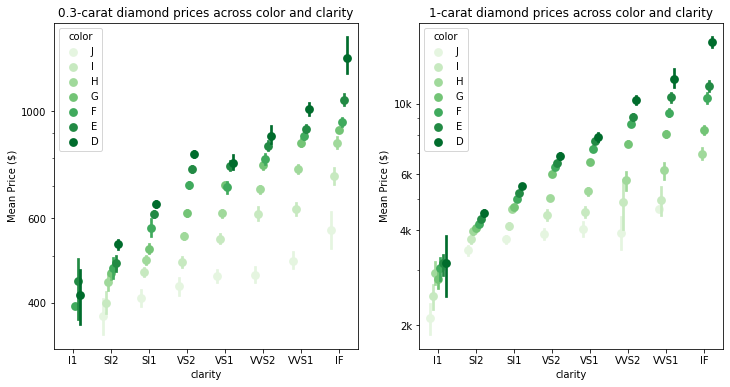

In [38]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sb.pointplot(data = diamonds_sml, x = 'clarity', y = 'price', hue = 'color',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('0.3-carat diamond prices across color and clarity')
ax[0].set_ylabel('Mean Price ($)')
ax[0].set_yscale('log')
ax[0].set_yticks([400, 600, 1000])
ax[0].set_yticklabels(['400', '600', '1000'])
ax[0].set_yticklabels([],minor = True)

sb.pointplot(data = diamonds_1c, x = 'clarity', y = 'price', hue = 'color',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('1-carat diamond prices across color and clarity')
ax[1].set_ylabel('Mean Price ($)')
ax[1].set_yscale('log')
ax[1].set_yticks([2e3, 4e3, 6e3, 1e4])
ax[1].set_yticklabels(['2k', '4k', '6k', '10k'])
ax[1].set_yticklabels([],minor = True)
plt.show();

The hierarchy in pricing by color is clear when clustered across clarity values. The pattern looks more systematic than the "cut by clarity" pointplots.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of price against diamond size in this section by looking at the impact of the three categorical quality features. The multivariate exploration here showed that there indeed is a positive effect of increased quality grade on diamond price, but in the dataset, this is initially hidden by the fact that higher grades were more prevalent in smaller diamonds, which fetch lower prices overall. Controlling for the carat weight of a diamond shows the effect of the other C's of diamonds more clearly. This effect was clearest for the color and clarity variables, with less systematic trends for cut.

### Were there any interesting or surprising interactions between features?

Looking back on the point plots, it doesn't seem like there's a systematic interaction effect between the three categorical features. However, the features also aren't fully independent. But it is interesting in something like the 1-carat plot for prices against cut and clarity, the shape of the 'cut' dots is fairly similar for the SI2 through VVS2 clarity levels.